##  Artificial Neural Networks
![Biological Neuron](../img/perceptron_neuron.png)

#### How do biological neurons work?
The signals of variable magnitudes arrive at the dendrites. Those input signals are then accumulated in the cell body of the neuron, and if the accumulated signal exceeds a certain threshold, a output signal is generated that which will be passed on by the axon. 

###### Transmitting information

All neurons are electrically excitable. The electrical impulse mostly arrives on the dendrites, gets processed into the cell body to then move along the axon.On its all length an axon functions merely as an electric cable, simply transmitting the signal. Once the electrical reaches the end of the axon, at the synapses, things get a little more complex.
 


The key to neural function is the synaptic signaling process, which is partly electrical and partly chemical. Once the electrical signal reaches the synapse, a special molecule called neurotransmitter is released by the neuron. This neurotransmitter will then stimulate the second neuron, triggering a new wave of electrical impulse, repeating the mechanism described above.


#### Understanding the Perceptron

A Perceptron is a Single Neuron that can take multiple inputs and produce a Binary Output. A perceptron receives multiple input signals, and if the sum of the input signals exceed a certain threshold it either returns a signal or remains “silent” otherwise. 

![Artificial Neuron](../img/perceptron_schematic.png)

###### The Activation Function is also called a Transfer Function


### Understanding Neural Networks

Multiple Layers of Perceptrons together form a Neural Network

![Artificial Neural Network](../img/neural_network.png)

#### Components of a Neural Network

Perceptron Layers

Activation Function - Used to Activate the output based on the inputs
    1. Signmoid
    2. RELU
    3. tanh
    

Cost Function - Used to measure the error between the actual and predicted outputs so that the model can be optimised to reduce the errors

    1. Binary Cross Entropy 
    2. Negative Log Likelihood
    3. Margin Classifier
    4. Soft Margin Classifier
    

Optimization Function - Used to Optmise the weights used for reduction of error given by the cost function. This is done through a process called backpropogation

    1. Stochastic Gradient Decent
    2. Adagrad
    3. Adam

References
https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

In [1]:
##### We need the imutils library which is not default in google colab
!pip install imutils

  Running setup.py bdist_wheel for imutils ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4c/ff/aa/824fb9efc5b8c740d54cd8bc19c7e85fbb8d115c77e56812c7
Successfully built imutils


In [2]:
##### downlaod the dogs and cats dataset and save it to a local directory called data
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/


Redirecting output to ‘wget-log’.
Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.8643.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.6391.jpg  
  inflating: data/dogscats

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense
import keras
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import os


Using TensorFlow backend.


In [4]:
#### Extract a list of image file names from the directory to visualise
PATH = 'data/dogscats/'
#### run the list files command and get the top results and save it into a list object
files = !ls {PATH}valid/cats | head 
print(files)

['cat.10016.jpg', 'cat.1001.jpg', 'cat.10026.jpg', 'cat.10048.jpg', 'cat.10050.jpg', 'cat.10064.jpg', 'cat.10071.jpg', 'cat.10091.jpg', 'cat.10103.jpg', 'cat.10104.jpg']


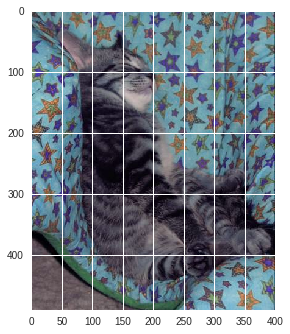

In [6]:
#### Open and Visualise a Single Image
img_path = PATH +'valid/cats/'+files[2]
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [0]:
#### Lets intialise some list variables
data = []
labels = []
dataset_path = 'data/dogscats/train'

#### the imutils paths.list_images function will return the full path of all images
#### in the current directory and its sub-directories
imagePaths = list(paths.list_images(dataset_path))

In [8]:
##### Iterate through all the imagepaths generated previously and load every image
##### figure out the label of the image from its path

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath,0)
    
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
   
    #### Resize the Image and then use the raw pixel values as features
    features = cv2.resize(image, (32, 32))
    features = features.flatten()
    
    #### Append the features and labels to our list variables
    data.append(features)
    labels.append(label)
    
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/23000
[INFO] processed 2000/23000
[INFO] processed 3000/23000
[INFO] processed 4000/23000
[INFO] processed 5000/23000
[INFO] processed 6000/23000
[INFO] processed 7000/23000
[INFO] processed 8000/23000
[INFO] processed 9000/23000
[INFO] processed 10000/23000
[INFO] processed 11000/23000
[INFO] processed 12000/23000
[INFO] processed 13000/23000
[INFO] processed 14000/23000
[INFO] processed 15000/23000
[INFO] processed 16000/23000
[INFO] processed 17000/23000
[INFO] processed 18000/23000
[INFO] processed 19000/23000
[INFO] processed 20000/23000
[INFO] processed 21000/23000
[INFO] processed 22000/23000


In [9]:
##### Print the labels of different objects to see they are different
print(labels[0])
print(labels[17000])
print(data[7000].shape)

cat
dog
(1024,)


In [10]:
#### Encode the labels to Numerical Values
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])

#### One Hot Encode the Numerical Values
labels = np_utils.to_categorical(labels, 2)
print(labels[0])

#### Scale the input pixel values
data = np.array(data) / 255.0

0
[1. 0.]


In [0]:
#### Create a train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.1, random_state=42)

In [0]:
#### Create a model object of the Sequential Class
model = Sequential()
#### Add layers to the model one at a time
#### The first parameters if the number of outputs (784) for that layer
#### The second parameter is the number of inputs (only for the first layer)
#### The kernel_initialiser parameter, is used to initialise the weights for perceptrons
#### in the layer
model.add(Dense(784, input_dim=1024, kernel_initializer="uniform",activation="relu"))
model.add(Dense(392, kernel_initializer="uniform", activation="relu"))
model.add(Dense(196, kernel_initializer="uniform", activation="relu"))
model.add(Dense(98, kernel_initializer="uniform", activation="relu"))
model.add(Dense(2)) # 10 Output Layers Corresponding to 10 Classes / Digits 0 - 9
model.add(Activation("softmax"))

In [13]:
#### We create a Adam Optimiser Object for the backpropogation of our weights
#### The Learning Rate Parameter defines as to how large a change will be 
#### made to the weights of the network

adam = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
print("[INFO] Model Compiled")

[INFO] Model Compiled


In [17]:
#### The training process of our model
#### The batch size parameter defines as to how often a change would be made to the weights
model.fit(trainData, trainLabels,  epochs=25, batch_size=64)

Epoch 1/25
20700/20700 [==============================] - 3s 132us/step - loss: 0.4518 - acc: 0.7741
Epoch 2/25
20700/20700 [==============================] - 3s 133us/step - loss: 0.4396 - acc: 0.7770
Epoch 3/25
20700/20700 [==============================] - 3s 135us/step - loss: 0.4530 - acc: 0.7747
Epoch 4/25
20700/20700 [==============================] - 3s 134us/step - loss: 0.4410 - acc: 0.7781
Epoch 5/25
20700/20700 [==============================] - 3s 132us/step - loss: 0.4356 - acc: 0.7833
Epoch 6/25
20700/20700 [==============================] - 3s 133us/step - loss: 0.4302 - acc: 0.7887
Epoch 7/25
20700/20700 [==============================] - 3s 134us/step - loss: 0.4236 - acc: 0.7883
Epoch 8/25
20700/20700 [==============================] - 3s 133us/step - loss: 0.4207 - acc: 0.7920
Epoch 9/25
20700/20700 [==============================] - 3s 133us/step - loss: 0.4200 - acc: 0.7936
Epoch 10/25
20700/20700 [==============================] - 3s 134us/step - loss: 0.4102 - a

In [28]:
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=256, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

[INFO] evaluating on testing set...
2300/2300 [==============================] - 0s 18us/step
[INFO] loss=1.1699, accuracy: 59.3478%


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':'19PbbBVytGKdmMgeOmqRsXhceGLZGdzci'}) # replace the id with id of file you want to access
downloaded.GetContentFile('dog.jpeg')  
downloaded = drive.CreateFile({'id':'1SboBUMGeAV0eIJgQBESKWsLgOl3o-rgT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('dog2.jpeg')  

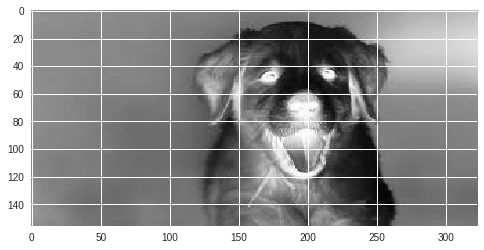

In [23]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image
#image = cv2.imread("data/dogscats/valid/cats/cat.8519.jpg",0)

image = cv2.imread("dog2.jpeg",0)
plt.imshow(image)
plt.show()


In [24]:
##### Flatten the test image
test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)
test_feature = test_feature.flatten()
print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0])

pr = model.predict_classes(test_feature)
pro = model.predict_proba(test_feature)
print(pr, pro)

(32, 32)
(1024,)
[0] [[1.0000000e+00 7.7445643e-19]]


In [25]:
##### Print Predictions
test_prediction = model.predict(test_feature)
print("[INFO] CAT={:.10f}%, DOG: {:.10f}%".format(test_prediction[0][0]*100, test_prediction[0][1]*100))

[INFO] CAT=100.0000000000%, DOG: 0.0000000000%
